## Ecuador Disaster Images ##

## Discussion ##

### Looking at the heatmap, the model does not perform as well on 1s as on 0s considering on the diagonal, the 1s is darker. On the error plot, the column for class 0 is quite bright, which tells that many images get missclassified as 0s. The model performs better when only the last layer is fine-tuned with test set accuracy of 90.789% compared to 84.868% when more layers are fine-tuned. This is an indication that the pre-trained NasNet model is similar to our dataset as the higher layers represent more specific object features. ###

### The dataset size is not a representative of how well the model performs. The highest test-set accuracies are not necessarily the largest dataset size ###

In [13]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [14]:
import tensorflow as tf

tf.test.gpu_device_name()

''

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [16]:
import os

In [17]:
from sklearn.metrics import confusion_matrix

## Load data ##

In [20]:
train_dir = 'data/train'
validation_dir = 'data/validation'
test_dir = 'data/test'

In [21]:
train_damaged_dir = os.path.join(train_dir, 'damaged')  # directory with our training damaged pictures
train_undamaged_dir = os.path.join(train_dir, 'undamaged')  # directory with our training undamaged pictures
validation_damaged_dir = os.path.join(validation_dir, 'damaged')  # directory with our validation damaged pictures
validation_undamaged_dir = os.path.join(validation_dir, 'undamaged')  # directory with our validation undamaged pictures
test_damaged_dir = os.path.join(test_dir, 'damaged')  # directory with our test damaged pictures
test_undamaged_dir = os.path.join(test_dir, 'undamaged')  # directory with our test undamaged pictures


## Understand the data ##

### Let's look at how many damaged and undamaged images are in the training and validation directory: ###

In [22]:
num_damaged_tr = len(os.listdir(train_damaged_dir))
num_undamaged_tr = len(os.listdir(train_undamaged_dir))

num_damaged_val = len(os.listdir(validation_damaged_dir))
num_undamaged_val = len(os.listdir(validation_undamaged_dir))

num_damaged_ts = len(os.listdir(test_damaged_dir))
num_undamaged_ts = len(os.listdir(test_undamaged_dir))

total_train = num_damaged_tr + num_undamaged_tr
total_val = num_damaged_val + num_undamaged_val
total_test = num_damaged_ts + num_undamaged_ts

In [23]:
print('total training damaged images:', num_damaged_tr)
print('total training undamaged images:', num_undamaged_tr)

print('total validation damaged images:', num_damaged_val)
print('total validation undamaged images:', num_undamaged_val)

print('total test damaged images:', num_damaged_ts)
print('total test undamaged images:', num_undamaged_ts)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)
print("Total test images:", total_test)

total training damaged images: 821
total training undamaged images: 547
total validation damaged images: 273
total validation undamaged images: 183
total test damaged images: 274
total test undamaged images: 182
--
Total training images: 1368
Total validation images: 456
Total test images: 456


In [24]:
# set up variables
#batch_size = 128


#batch_size = 64


batch_size = 128
#epochs = 5
#IMG_HEIGHT = 150
#IMG_WIDTH = 150

# VGG19, VGG16, Inception
#IMG_HEIGHT = 224
#IMG_WIDTH = 224

# inceptionV3
#IMG_HEIGHT = 299
#IMG_WIDTH = 299


IMG_HEIGHT = 331
IMG_WIDTH = 331

## Data preparation ##

In [25]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our test data

In [26]:
#train_image_generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, featurewise_center=True, featurewise_std_normalization=True, rescale=1./255) # Generator for our training data
#validation_image_generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, featurewise_center=True, featurewise_std_normalization=True, rescale=1./255) # Generator for our validation data
#test_image_generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, featurewise_center=True, featurewise_std_normalization=True, rescale=1./255) # Generator for our test data

In [27]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 1368 images belonging to 2 classes.


In [28]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 456 images belonging to 2 classes.


In [29]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=test_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 456 images belonging to 2 classes.


## Visualize training images ##

In [233]:
sample_training_images, _ = next(train_data_gen)

In [234]:
sample_training_images, labels = next(train_data_gen)

In [235]:
labels

array([1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [236]:
sample_training_images, labels = next(train_data_gen)

In [177]:
labels

array([1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1.], dtype=float32)

In [178]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

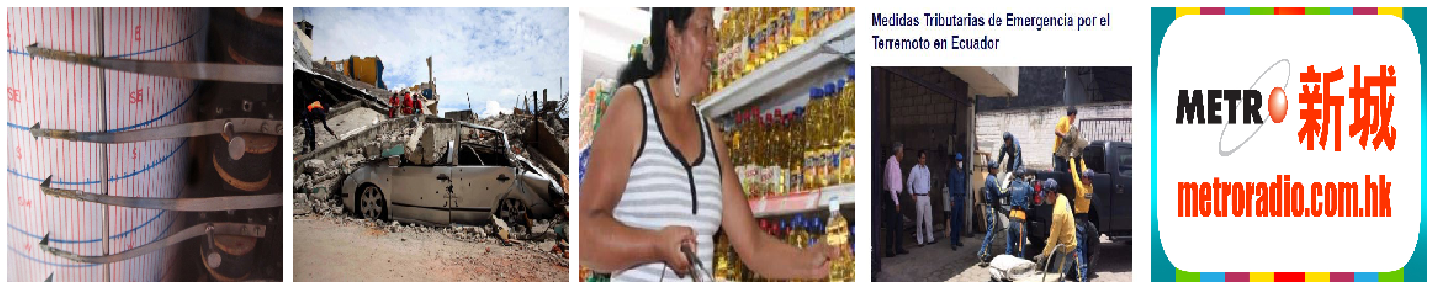

In [179]:
plotImages(sample_training_images[:5])

In [143]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(40,40))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      #plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.title(label_batch[n], fontdict={'fontsize':28})
      plt.axis('off')

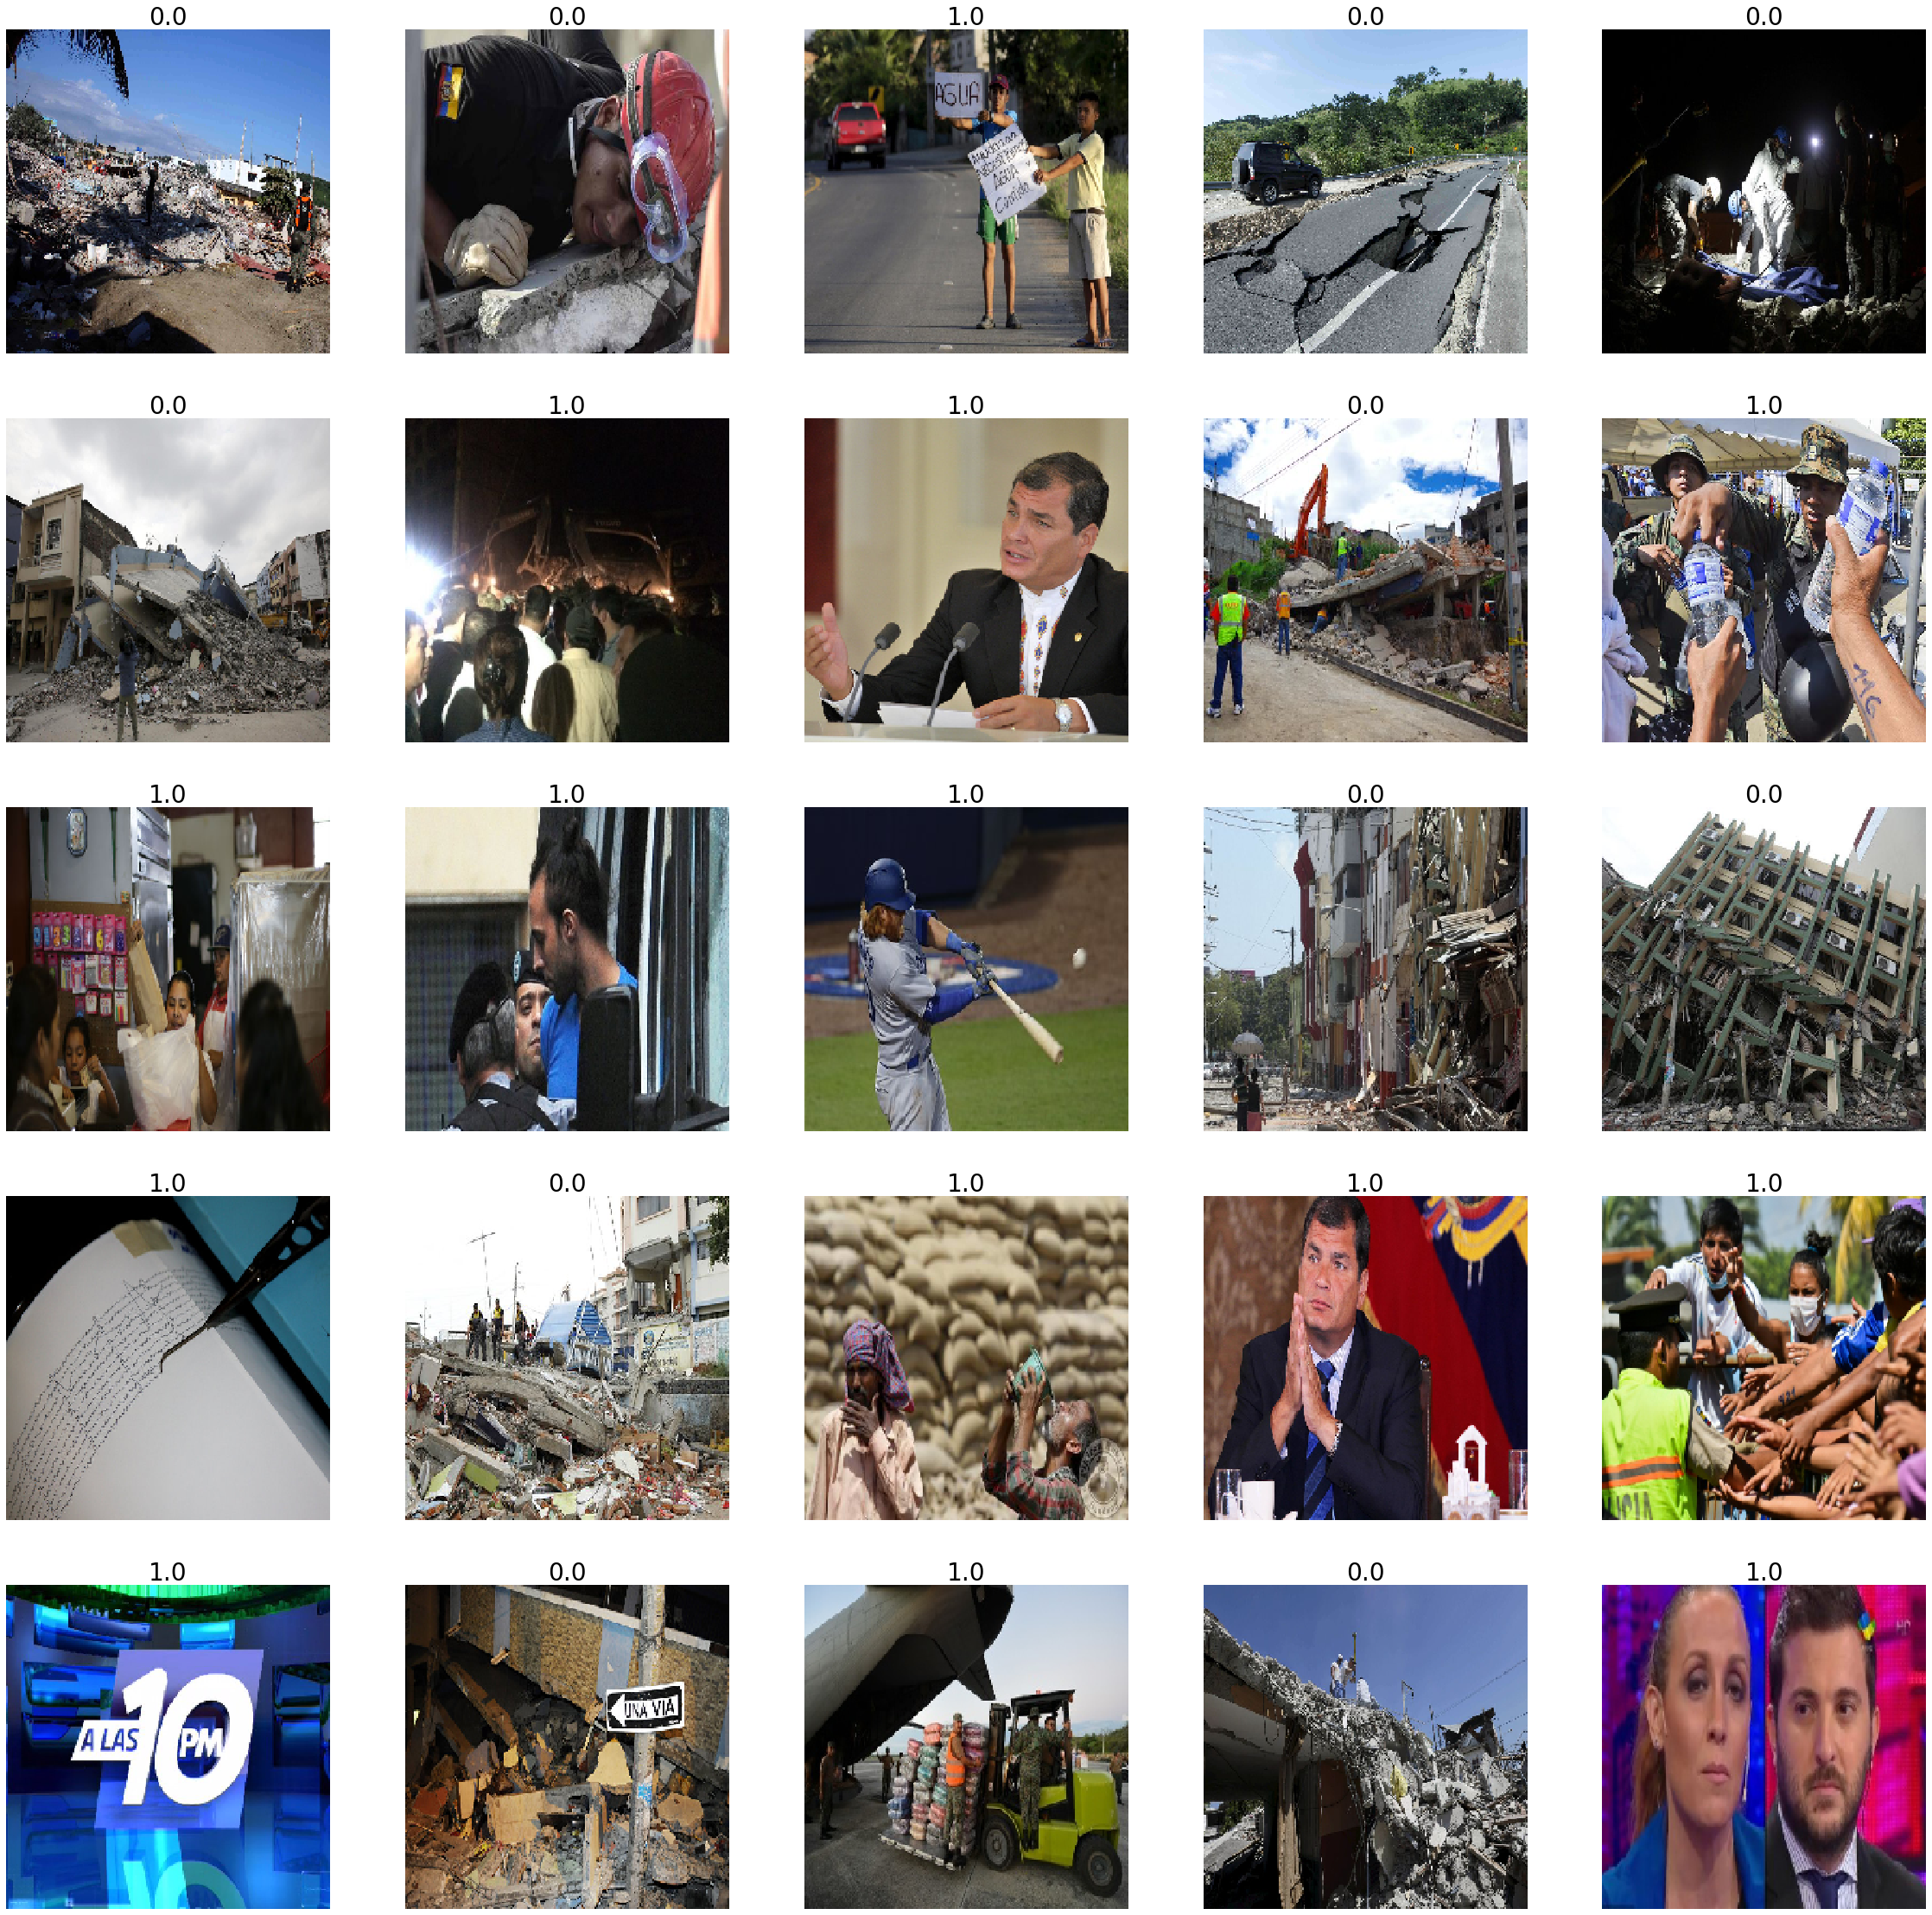

In [144]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [145]:
#train_data_gen.classes[:50]

In [146]:
label_batch

array([0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

## NASNetLarge Pre-trained model ##

In [8]:
from keras.applications.nasnet import NASNetLarge
from keras.preprocessing import image
from keras.applications.nasnet import preprocess_input

Using TensorFlow backend.


In [9]:
from keras import optimizers

In [10]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

In [207]:
base_model = NASNetLarge(weights='imagenet', include_top=False)

In [113]:
#rmsprop = optimizers.RMSprop(lr=0.00003, rho=0.9)

In [114]:
# add a global spatial average pooling layer
x = base_model.output

#x = Dropout(0.5)(x)

x = GlobalAveragePooling2D()(x)

# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)


# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model_NasNet = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model_NasNet.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


#model_NasNet.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [115]:
from keras.callbacks import EarlyStopping

In [116]:
callback = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [117]:
history_NasNet = model_NasNet.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=60,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size,
    #callbacks=[callback, cp_callback]
    callbacks=[callback]
)

Epoch 1/60


/home/demolakstate/anaconda3/envs/dl/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/demolakstate/anaconda3/envs/dl/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 583s 58s/step - loss: 5.8518 - acc: 0.5852 - val_loss: 6.3381 - val_acc: 0.6068
Epoch 2/60
10/10 [==============================] - 497s 50s/step - loss: 6.2137 - acc: 0.6039 - val_loss: 4.8131 - val_acc: 0.3994
Epoch 3/60
10/10 [==============================] - 524s 52s/step - loss: 1.2459 - acc: 0.6875 - val_loss: 0.3578 - val_acc: 0.8628
Epoch 4/60
10/10 [==============================] - 508s 51s/step - loss: 0.4024 - acc: 0.8325 - val_loss: 0.4053 - val_acc: 0.8262
Epoch 5/60
10/10 [==============================] - 509s 51s/step - loss: 0.4310 - acc: 0.8299 - val_loss: 0.7098 - val_acc: 0.7526
Epoch 6/60
10/10 [==============================] - 525s 52s/step - loss: 0.3659 - acc: 0.8468 - val_loss: 1.8418 - val_acc: 0.6311
Epoch 7/60
10/10 [==============================] - 516s 52s/step - loss: 0.4549 - acc: 0.8198 - val_loss: 0.9288 - val_acc: 0.7226
Epoch 8/60
10/10 [==============================] - 524s 52s/step - loss: 0.3573 - acc:

KeyboardInterrupt: 

In [47]:
# Save the entire model to a HDF5 file
#model_NasNet.save('NasNet/NasNet_model_90_789.h5')


In [5]:
#model_NasNet.load_weights('NasNet/NasNet_model_90_789.h5')

In [76]:
#model_NasNet.load_weights('NasNet/NasNet_model.h5')


#new_model_NasNet = tf.keras.models.load_model('NasNet/NasNet_model.h5')

In [18]:
#model_NasNet = tf.keras.models.load_model('NasNet/NasNet_model_90_789.h5')

W1201 19:32:43.127415 139903387318080 deprecation.py:573] From /home/demolakstate/anaconda3/envs/dl/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py:507: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with distribution=normal is deprecated and will be removed in a future version.
Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`
W1201 19:32:43.134390 139903387318080 deprecation.py:506] From /home/demolakstate/anaconda3/envs/dl/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Visualize NasNetLarge model ##

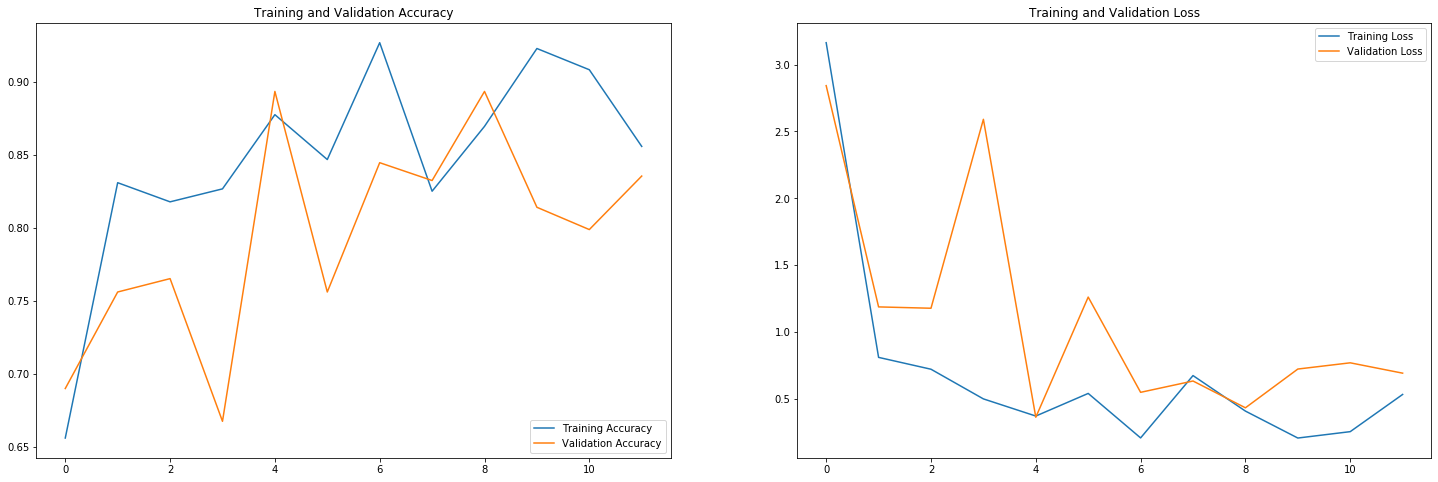

In [142]:
acc = history_NasNet.history['acc']
val_acc = history_NasNet.history['val_acc']

loss = history_NasNet.history['loss']
val_loss = history_NasNet.history['val_loss']

epochs_range = range(12)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluation of NasNet model accuracy on test data ##

### Let's compare how the model performs on the test dataset ###

In [48]:
test_loss, test_acc = model_NasNet.evaluate_generator(test_data_gen, verbose=0)

In [49]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9078947410248873


In [567]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9013157926107708


In [568]:
print('\nTest loss:', test_loss)


Test loss: 0.36685853987409356


## Make predictions on test data ##

### Let's make predictions on some images ###

In [30]:
test_data_gen.class_indices

{'damaged': 0, 'undamaged': 1}

In [31]:
predictions = model_NasNet.predict_generator(test_data_gen)

In [32]:
true_labels = test_data_gen.classes

In [33]:
predictions[0]

array([0.9622572 , 0.03774277], dtype=float32)

In [34]:
np.argmax(predictions[0])

0

In [35]:
test_data_gen.classes[0]

0

In [36]:
predictions[-1]

array([0.00252942, 0.9974706 ], dtype=float32)

In [37]:
np.argmax(predictions[-1])

1

In [38]:
test_data_gen.classes[-1]

1

In [39]:
test_data_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Confusion Matrix ##

In [47]:
import matplotlib.pyplot as plt
import numpy as np

In [41]:
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in predictions])

In [42]:
y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [43]:
cm = confusion_matrix(y_true, y_pred)

In [44]:
print(cm)

[[159 115]
 [105  77]]


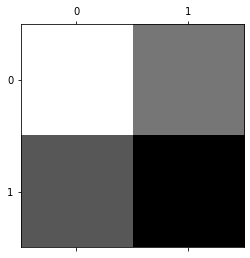

In [45]:
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

## Plot on Errors ##

In [46]:
row_sums = cm.sum(axis=1, keepdims=True)
norm_cm = cm / row_sums

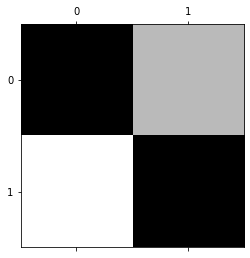

In [48]:
np.fill_diagonal(norm_cm, 0)
plt.matshow(norm_cm, cmap=plt.cm.gray)
plt.show()

## Confusion Matrix Heat Map ##

In [583]:
#!pip install seaborn

In [584]:
#import seaborn as sb

In [585]:
#heat_map = sb.heatmap(cm, annot=True)
#sb.set(font_scale=1)
#plt.show()

## Classification report of NasNet on test set ##

In [586]:
from sklearn.metrics import classification_report

In [587]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.62      0.62       274
           1       0.42      0.41      0.41       182

    accuracy                           0.54       456
   macro avg       0.52      0.52      0.52       456
weighted avg       0.54      0.54      0.54       456



## Fine-tuning more layers in NASNetLarge ##

In [219]:
from keras.callbacks import EarlyStopping

In [220]:
checkpoint_path = "NasNet/cp_2.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [221]:
# Create a callback that save the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

In [222]:
#callback = EarlyStopping(monitor='val_loss', patience=7)

callback = EarlyStopping(monitor='val_acc', patience=7, restore_best_weights=True)

In [223]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_12
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [224]:
# we chose to train  blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model_NasNet.layers[:1031]:
   layer.trainable = False
for layer in model_NasNet.layers[1031:]:
   layer.trainable = True

In [225]:
# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model_NasNet.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [237]:
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history_NasNet_2 = model_NasNet.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=15,
    callbacks=[callback],
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
10/10 [==============================] - 603s 60s/step - loss: 0.1452 - acc: 0.9617 - val_loss: 0.4612 - val_acc: 0.8333
Epoch 2/15
10/10 [==============================] - 491s 49s/step - loss: 0.1450 - acc: 0.9608 - val_loss: 0.4970 - val_acc: 0.8262
Epoch 3/15
10/10 [==============================] - 499s 50s/step - loss: 0.1479 - acc: 0.9602 - val_loss: 0.3536 - val_acc: 0.8476
Epoch 4/15
10/10 [==============================] - 487s 49s/step - loss: 0.1545 - acc: 0.9585 - val_loss: 0.4883 - val_acc: 0.8262
Epoch 5/15
10/10 [==============================] - 522s 52s/step - loss: 0.1332 - acc: 0.9606 - val_loss: 0.4401 - val_acc: 0.8464
Epoch 6/15
10/10 [==============================] - 500s 50s/step - loss: 0.1560 - acc: 0.9547 - val_loss: 0.5182 - val_acc: 0.7988
Epoch 7/15
10/10 [==============================] - 474s 47s/step - loss: 0.1324 - acc: 0.9673 - val_loss: 0.4600 - val_acc: 0.8476
Epoch 8/15
10/10 [==============================] - 485s 49s/step - loss: 0.

In [240]:
test_loss, test_acc = model_NasNet.evaluate_generator(test_data_gen, verbose=0)

In [241]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8486842126177069


## Using Nepal model ##

In [91]:
new_model_NasNet = tf.keras.models.load_model('data_nepal_eq/NasNet_model_nepal.h5')

W1122 18:10:00.692306 139814666020672 deprecation.py:573] From /home/demolakstate/anaconda3/envs/dl/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py:507: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with distribution=normal is deprecated and will be removed in a future version.
Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`
W1122 18:10:00.807707 139814666020672 deprecation.py:506] From /home/demolakstate/anaconda3/envs/dl/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [92]:
test_loss, test_acc = new_model_NasNet.evaluate_generator(test_data_gen, verbose=0)

In [93]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.7894737


## Using ALL model ##

In [243]:
new_model_NasNet_all = tf.keras.models.load_model('data_all/NasNet_model_ALL.h5')

W1127 14:33:23.918341 140264243242816 deprecation.py:573] From /home/demolakstate/anaconda3/envs/dl/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py:507: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with distribution=normal is deprecated and will be removed in a future version.
Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`


In [244]:
test_loss, test_acc = new_model_NasNet_all.evaluate_generator(test_data_gen, verbose=0)

In [245]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8486842
